In [1]:
import ParseTimeTrials

FilePath = "TimeTrials.txt"
Parser = ParseTimeTrials.ParserClass()
Parser.AddFiles(FilePath)
Parser.Main()

I got this path TimeTrials.txt


Now that the input file is parsed and put into containers, get ready to plot. 
For your information, the size of the dataset is 20,000 rows x 15,000 columns. This 20,000 is a nice number because that is the number of genes in the human genome. Therefore a comparison of gene expression data will typically be about this many rows. The computational complexity of each similarity algorithm grows with the number of rows, where as the number of comparisions done in the BSF is simply N^2 / 2. So for this comparison there are 112 million comparisons for the 'up regulated' matrix and 112 million comparisons for the 'down regulated' matrix. Making in total about 225 million comparisons.

Some example output simply to look at.

In [6]:
#print out the keys for the bakeoff
print (Parser.SeriesData.keys())
Method = "original popcount"
Parser.SeriesData[Method].AllData



dict_keys(['tanimoto', 'original popcount', 'adjusted popcount', 'cosine', 'euclidean'])


{1000: [5.3352341999999995, 7.5660485, 6.3736373, 5.5315531],
 4000: [21.1693357, 23.1349483, 21.247336200000003, 21.247336200000003],
 8000: [32.4638081, 33.6338156, 32.4326079, 32.5106084],
 12000: [38.189044800000005, 38.4542465, 38.2670453, 38.2982455],
 16000: [42.369871599999996,
  42.1826704,
  42.260670899999994,
  42.260670899999994],
 20000: [45.879894099999994, 45.458691400000006, 46.4316427, 45.7862935]}

In [7]:
Parser.SeriesData[Method].AverageTime


{1000: 6.2016182750000004,
 4000: 21.699739100000002,
 8000: 32.760210000000001,
 12000: 38.302145525000007,
 16000: 42.268470949999994,
 20000: 45.889130424999998}

In [8]:
Parser.SeriesData[Method].StdevTime

{1000: 0.87904338459726894,
 4000: 0.82923006191783377,
 8000: 0.50513981364616634,
 12000: 0.096402433295959281,
 16000: 0.066643656413663169,
 20000: 0.35009215415786582}

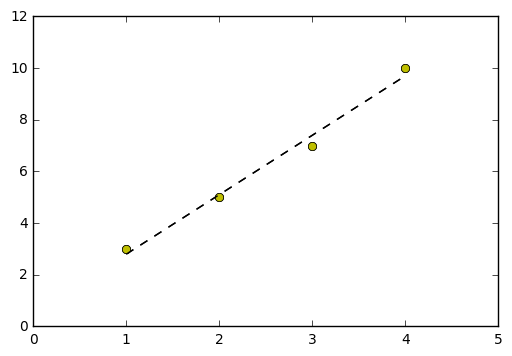

In [10]:
#now I'm creating a function which predicts the response of various inputs (Signature Bit lengths)
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 


plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt



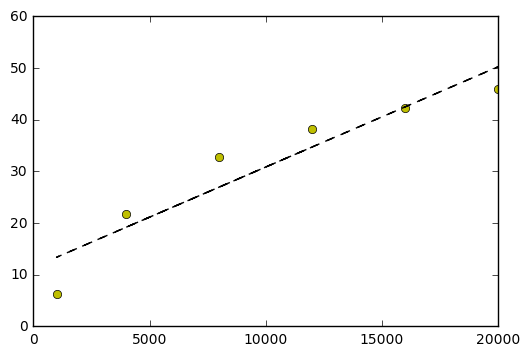

89.1058089087


In [18]:
#BitLengths = number of bits in a signature. called 'bl' for short
bl = list(Parser.SeriesData["cosine"].AverageTime.keys())
cosine_observedtimes = list(Parser.SeriesData["cosine"].AverageTime.values())
euclidean_observedtimes = list(Parser.SeriesData["euclidean"].AverageTime.values())
bsf_observedtimes = list(Parser.SeriesData["original popcount"].AverageTime.values())

#now make fit functions, like in an example that I found online
#(http://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy)
#all functions have the same bit length, so they all use 'bl' as the x coordinate
fit_cosine = np.polyfit(bl, cosine_observedtimes, 1)
fit_cosine_fx = np.poly1d(fit_cosine)
fit_euclidean = np.polyfit(bl, euclidean_observedtimes, 1)
fit_euclidean_fx = np.poly1d(fit_euclidean)
fit_bsf = np.polyfit(bl, bsf_observedtimes, 1)
fit_bsf_fx = np.poly1d(fit_bsf)

#show the fit function, just for fun
plt.plot(bl, bsf_observedtimes, 'yo', bl, fit_bsf_fx(bl), '--k')
#plt.plot(bl, cosine_observedtimes, 'yo', bl, fit_cosine_fx(bl), '--k')
#plt.plot(bl, euclidean_observedtimes, 'yo', bl, fit_euclidean_fx(bl), '--k')
plt.show()

#Now let's ask my program how long this will take for some obsenely long bit signature, like 40,000
time_bsf_40k = fit_bsf_fx(40000)
print (time_bsf_40k)


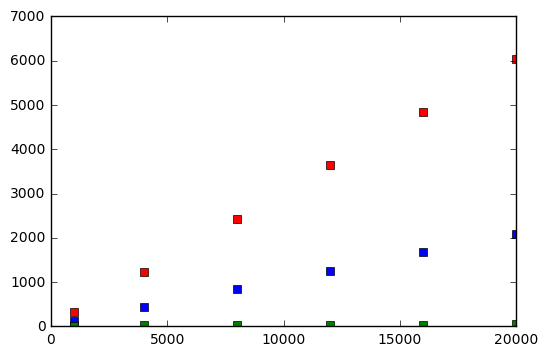

In [9]:
plt.plot(bl, cosine_observedtimes, 'rs', bl, euclidean_observedtimes, 'bs', bl, bsf_observedtimes, 'gs') #inexplicably 'rs' means red square
plt.show()